<a href="https://colab.research.google.com/github/refido/cyber-bullying/blob/main/CyberBully_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UAS**

**Identitas Kelompok**

*   Muhammad Daffa' Athallah Rifqi / 2241727025
*   Osy Krisdayanti / 2241727027
*   Refido Berliano Hartawan / 2241727028



**Kelas : TI-4J**

# **Persiapan Data**

In [1]:
# improting lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import warnings
warnings.filterwarnings('ignore')
# import label encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# panggil csv
reviews_data = pd.read_csv('/content/drive/MyDrive/dataSet/Cyberbullying_Dataset.csv')

In [3]:
reviews_data.head()

,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
1,NaN,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB


In [4]:
# check apakah ada duplikasi
duplicated_comments = reviews_data.duplicated(subset = ['Comments'])
print("Total number of duplicated comments:", sum(duplicated_comments))

# print duplikasi comment
print("Duplciated Comments in the dataset:")
reviews_data[duplicated_comments]

Total number of duplicated comments: 9
Duplciated Comments in the dataset:


,Comments,Classes
1991,Just saw her work from a few days ago. It's br...,NB
1992,The motive doesn't lessen the outcome.,NB
1993,Then I have no idea.,NB
1994,You could think of the worst possible idea eve...,NB
1995,She was already linked. She doesn't care.,NB
1996,It seems that she doesn't care about facts.,NB
1997,That girl is hideous in every way.,B
1998,"I appreciate you bringing good content to me, ...",NB
1999,Was your previous praise tactical or just misp...,NB


In [5]:
# buang duplikasi comment yang ada
reviews_data_non_duplicated = reviews_data.drop_duplicates(subset = ['Comments'], keep = 'first')

# cetak shape review
print("Shape of reviews_data_non_duplicated:", reviews_data_non_duplicated.shape)
reviews_data_non_duplicated

Shape of reviews_data_non_duplicated: (1991, 2)


,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
1,NaN,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldn't do,B
1988,It's very much a job for a lady,B
1989,I'm not sure if I should listen to a woman giv...,B


In [6]:
# cek apakah ada comment yang null
print("Number of Null/NaN values in dataset column:")
reviews_data_non_duplicated.isnull().sum()

Number of Null/NaN values in dataset column:


Comments    1
Classes     8
dtype: int64

In [7]:
# drop rows (records) yang memiliki value Null/NaN.
reviews_data_cleaned = reviews_data_non_duplicated.dropna()
reviews_data_cleaned

,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldn't do,B
1988,It's very much a job for a lady,B
1989,I'm not sure if I should listen to a woman giv...,B


In [8]:
# Data Preparation.

# buang special characters (punctuation ) dari comments
def remove_puncuation(txt):
    txt_nopunct = "".join([char for char in txt if char not in string.punctuation])
    return txt_nopunct


reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].apply(lambda x: remove_puncuation(x))
reviews_data_cleaned

,Comments,Classes
0,123A commodity we trade is beet pulp so I aske...,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldnt do,B
1988,Its very much a job for a lady,B
1989,Im not sure if I should listen to a woman givi...,B


In [9]:
# buang digits (number) dari comments
def remove_digits(txt):
    txt_nodigit = "".join([char for char in txt if not char.isdigit()])
    return txt_nodigit


reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].apply(lambda x: remove_digits(x))
reviews_data_cleaned

,Comments,Classes
0,A commodity we trade is beet pulp so I asked a...,NB
2,A never opens all the way until he she is comp...,NB
3,A porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,SOME women should not be behind the wheel of a...,B
1987,there are some things girls just shouldnt do,B
1988,Its very much a job for a lady,B
1989,Im not sure if I should listen to a woman givi...,B


In [10]:
# convert semua text comment menjadi huruf kecil
reviews_data_cleaned['Comments'] = reviews_data_cleaned['Comments'].str.lower()
reviews_data_cleaned

,Comments,Classes
0,a commodity we trade is beet pulp so i asked a...,NB
2,a never opens all the way until he she is comp...,NB
3,a porn star who thinks she is better than an e...,NB
4,about and how sweet she is to every single per...,NB
5,about and how sweet she is to every single per...,NB
...,...,...
1986,some women should not be behind the wheel of a...,B
1987,there are some things girls just shouldnt do,B
1988,its very much a job for a lady,B
1989,im not sure if i should listen to a woman givi...,B


# **Visualisasi Data**

## **Word Cloud**

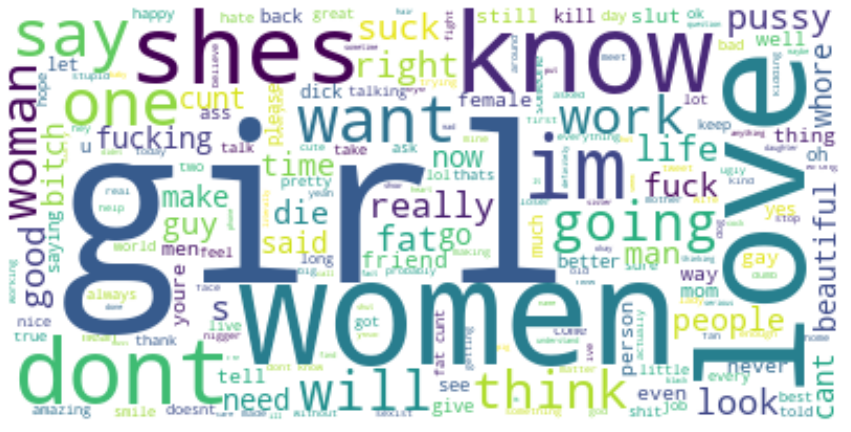

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in reviews_data_cleaned.Comments)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                     background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Pie Chart**

Text(0.5, 1.0, 'Persentase Jumlah Comment Not Bullying (NB) dan Bullying (B)')

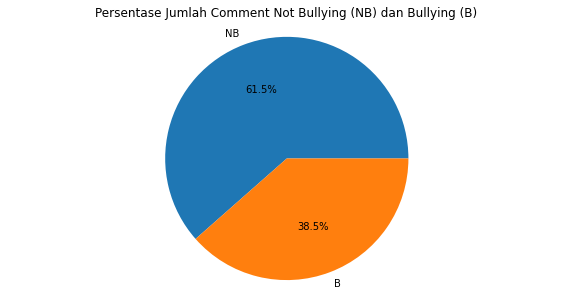

In [12]:
reviews_data_cleaned_classes = reviews_data_cleaned['Classes'].value_counts().rename_axis('keterlibatan_vltr_counted').reset_index(name='counts')

# print pie chart
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax1.pie(reviews_data_cleaned_classes['counts'], labels=reviews_data_cleaned_classes['keterlibatan_vltr_counted'], autopct='%1.1f%%', shadow=False)
ax1.axis('equal')
ax1.set_title('Persentase Jumlah Comment Not Bullying (NB) dan Bullying (B)')

# **Label Encoding**

Untuk menghapus kata-kata bahasa Inggris umum (stop_words) 

stop_words{‘english’}, list, default=None
Jika sebuah string, itu diteruskan ke _check_stop_list dan list berhenti yang sesuai dikembalikan. ‘english’ saat ini adalah satu-satunya nilai string yang didukung. Ada beberapa masalah umum dengan ‘english’ dan Anda harus mempertimbangkan alternatifnya (see Using stop words). 

Jika sebuah list, list itu dianggap berisi kata-kata berhenti, yang semuanya akan dihapus dari token yang dihasilkan. Hanya berlaku if analyzer == 'word'.

## **Merubah classes menjadi binary [0, 1] using Label Enconder**

In [13]:
print("Unique values in 'Classes' column:", reviews_data_cleaned['Classes'].unique() )

classes_labels = {'NB':0, 'B':1}

reviews_data_cleaned['Classes_Labels'] = reviews_data_cleaned['Classes'].map(classes_labels)
reviews_data_cleaned

Unique values in 'Classes' column: ['NB' 'B']


,Comments,Classes,Classes_Labels
0,a commodity we trade is beet pulp so i asked a...,NB,0
2,a never opens all the way until he she is comp...,NB,0
3,a porn star who thinks she is better than an e...,NB,0
4,about and how sweet she is to every single per...,NB,0
5,about and how sweet she is to every single per...,NB,0
...,...,...,...
1986,some women should not be behind the wheel of a...,B,1
1987,there are some things girls just shouldnt do,B,1
1988,its very much a job for a lady,B,1
1989,im not sure if i should listen to a woman givi...,B,1


## **Splitting the dataset into comments (features) and target (Classes)**

In [14]:
user_reviews = reviews_data_cleaned.loc[:, 'Comments']  # getting comments
reviews_classes = reviews_data_cleaned.loc[:, ['Classes_Labels']]  # getting Classes

print("First Five user_reviews:\n", user_reviews.head(), "\n")
print("First Five reviews_classes:\n", reviews_classes.head())

First Five user_reviews:
 0    a commodity we trade is beet pulp so i asked a...
2    a never opens all the way until he she is comp...
3    a porn star who thinks she is better than an e...
4    about and how sweet she is to every single per...
5    about and how sweet she is to every single per...
Name: Comments, dtype: object 

First Five reviews_classes:
    Classes_Labels
0               0
2               0
3               0
4               0
5               0


In [15]:
# Splitting data menjadi train and test set..
# 70% untuk training and 40% untuk testing..
train_review, test_review, train_label, test_label = train_test_split(user_reviews, reviews_classes, 
                                                                      test_size = 0.40, 
                                                                      random_state = 42)

In [16]:
print("Tampilkan train review")
train_review.head()


Tampilkan train review


210     hey how are you doing can take you out of depr...
1680                             who is to blame for that
141     did you know there are only  days between the ...
1432    youre the only man i dream about at night and ...
1394       she should be practising on her cooking skills
Name: Comments, dtype: object

In [17]:
print("Tampilkan train label")
train_label.head()

Tampilkan train label


,Classes_Labels
210,0
1680,0
141,0
1432,0
1394,1


## **CountVectorizer**

In [18]:
tfidf_vectorizer = TfidfVectorizer()

In [19]:
# Fitting and transforming countvectorizer on train_reviews
train_review_vectors = tfidf_vectorizer.fit_transform(train_review)
# transforming only on test_reviews using count_vectorizer
test_review_vectors = tfidf_vectorizer.transform(test_review)

# print("Shape of test_review_vectors:", test_review_vectors.shape)
# print("Shape of Train_review_vectors:", train_review_vectors.shape)

## **Classification Algorithms**

## 1) Random Forest Classification Algorithm

In [20]:
from sklearn.ensemble import  RandomForestClassifier

In [21]:
rand_for_clf = RandomForestClassifier(n_estimators = 200)

# training model pada train_set.
rand_for_clf.fit(train_review_vectors.toarray(), train_label) # menyediakan train_review_vectors dan train_labels

# prediksi pada test_review_vectors
predictions_rand_for_clf = rand_for_clf.predict(test_review_vectors.toarray())

# membandingkan true_labels dan predict_labels
print("Lima label groud_truth pertama dari test_label:\n", test_label[:5])
print("Lima prediksi pertama:\n", predictions_rand_for_clf[:5])

Lima label groud_truth pertama dari test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
Lima prediksi pertama:
 [1 1 1 0 0]


In [22]:
# Mengevaluasi Kinerja dari Random Forest
print("Mengevaluasi Kinerja dari Random Forest (RF) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_rand_for_clf) )

rand_for_clf_acc = accuracy_score(test_label, predictions_rand_for_clf)*100.0

print("Akurasi:", rand_for_clf_acc )

print("Laporan Klasifikasi:\n", 
      classification_report(test_label, predictions_rand_for_clf, target_names = ["NB", "B"]))

Mengevaluasi Kinerja dari Random Forest (RF) Algorithm:
Confusion Matrix:
 [[438  47]
 [ 33 275]]
Akurasi: 89.91172761664565
Laporan Klasifikasi:
               precision    recall  f1-score   support

          NB       0.93      0.90      0.92       485
           B       0.85      0.89      0.87       308

    accuracy                           0.90       793
   macro avg       0.89      0.90      0.89       793
weighted avg       0.90      0.90      0.90       793



## 2) Multinomial Naive Bayes (MNB) Algorithm

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
multi_nb_clf = MultinomialNB()

# training model pada train_set.
multi_nb_clf.fit(train_review_vectors.toarray(), train_label) # menyediakan train_review_vectors dan train_labels

# prediksi pada test_review_vectors
predictions_multi_nb_clf = multi_nb_clf.predict(test_review_vectors.toarray())

# membandingkan true_labels dan predicted_labels
print("Lima label groud_truth pertama dari test_label:\n", test_label[:5])
print("Lima prediksi pertama:\n", predictions_multi_nb_clf[:5])

Lima label groud_truth pertama dari test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
Lima prediksi pertama:
 [1 0 1 0 0]


In [25]:
# Mengevaluasi kinerja dari Multinomial Nayes Bayes (MNB)
print("Mengevaluasi kinerja dari Multinomial Nayes Bayes (MNB) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_multi_nb_clf) )
multi_nb_clf_acc = accuracy_score(test_label, predictions_multi_nb_clf)*100.0
print("Akurasi:", multi_nb_clf_acc)

print("Laporan Klasifikasi:\n", 
      classification_report(test_label, predictions_multi_nb_clf, target_names = ["NB", "B"]))

Mengevaluasi kinerja dari Multinomial Nayes Bayes (MNB) Algorithm:
Confusion Matrix:
 [[481   4]
 [141 167]]
Akurasi: 81.71500630517023
Laporan Klasifikasi:
               precision    recall  f1-score   support

          NB       0.77      0.99      0.87       485
           B       0.98      0.54      0.70       308

    accuracy                           0.82       793
   macro avg       0.87      0.77      0.78       793
weighted avg       0.85      0.82      0.80       793



## 3) GaussianNB -Naive Bayes Algorithm

In [26]:
# GaussianNB adalah jenis Algoritma Bayes
from sklearn.naive_bayes import GaussianNB

In [27]:
gau_nb_clf = GaussianNB()

# training model pada train_set.
gau_nb_clf.fit(train_review_vectors.toarray(), train_label) # menyediakan train_review_vectors dan train_labels

# prediksi pada test_review_vectors
predictions_gau_nb_clf = gau_nb_clf.predict(test_review_vectors.toarray())

# membandingkan true_labels dan predicted_labels
print("Lima label groud_truth pertama dari test_label:\n", test_label[:5])
print("Lima prediksi pertama:\n", predictions_gau_nb_clf[:5])

Lima label groud_truth pertama dari test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
Lima prediksi pertama:
 [1 0 1 0 1]


In [28]:
# Mengevaluasi Kinerja dari GaussianNB (GNB)
print("Mengevaluasi Kinerja dari GaussianNB (GNB) Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_multi_nb_clf) )

gau_nb_clf_acc = accuracy_score(test_label, predictions_gau_nb_clf)*100.0

print("Akurasi:", gau_nb_clf_acc )

print("Laporan Klasifikasi:\n", 
      classification_report(test_label, predictions_gau_nb_clf, target_names = ["NB", "B"]))

Mengevaluasi Kinerja dari GaussianNB (GNB) Algorithm:
Confusion Matrix:
 [[481   4]
 [141 167]]
Akurasi: 66.9609079445145
Laporan Klasifikasi:
               precision    recall  f1-score   support

          NB       0.78      0.64      0.70       485
           B       0.56      0.71      0.63       308

    accuracy                           0.67       793
   macro avg       0.67      0.68      0.67       793
weighted avg       0.69      0.67      0.67       793



## 4) Decision Tree Classification Algorithm

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dec_tree_clf = DecisionTreeClassifier()

# training model pada train_set.
dec_tree_clf.fit(train_review_vectors.toarray(), train_label) # menyediakan train_review_vectors dan train_labels

# prediksi pada test_review_vectors
predictions_dec_tree_clf = dec_tree_clf.predict(test_review_vectors.toarray())

# membandingkan true_labels dan predicted_labels
print("Lima label groud_truth pertama dari test_label:\n", test_label[:5])
print("Lima prediksi pertama:\n", predictions_dec_tree_clf[:5])

Lima label groud_truth pertama dari test_label:
       Classes_Labels
583                1
1968               1
1253               1
1103               0
925                0
Lima prediksi pertama:
 [1 1 0 0 1]


In [31]:
# Mengevaluasi kinerja dari Decision Tree Algorithm
print("Mengevaluasi kinerja dari Decision Tree Algorithm:")
print("Confusion Matrix:\n", confusion_matrix(test_label, predictions_dec_tree_clf) )

dec_tree_clf_acc = accuracy_score(test_label, predictions_dec_tree_clf)*100.0

print("Akurasi:", dec_tree_clf_acc )

print("Laporan Klasifikasi:\n", 
      classification_report(test_label, predictions_dec_tree_clf, target_names = ["NB", "B"]))

Mengevaluasi kinerja dari Decision Tree Algorithm:
Confusion Matrix:
 [[429  56]
 [ 63 245]]
Akurasi: 84.9936948297604
Laporan Klasifikasi:
               precision    recall  f1-score   support

          NB       0.87      0.88      0.88       485
           B       0.81      0.80      0.80       308

    accuracy                           0.85       793
   macro avg       0.84      0.84      0.84       793
weighted avg       0.85      0.85      0.85       793



In [32]:
# menggabungkan semua akurasi algoritma dalam satu tabel.
all_algos_result = {
    'Multinomail NB Accuracy': multi_nb_clf_acc,
    'Gaussian NB Accuracy' : gau_nb_clf_acc,
    'Decision Tree Accuracy': dec_tree_clf_acc,
    'Random Forest Accuracy' : rand_for_clf_acc
}
print("Overall Accuracy of all classification algorithms:\n")
all_algos_result

Overall Accuracy of all classification algorithms:



{'Multinomail NB Accuracy': 81.71500630517023,
 'Gaussian NB Accuracy': 66.9609079445145,
 'Decision Tree Accuracy': 84.9936948297604,
 'Random Forest Accuracy': 89.91172761664565}

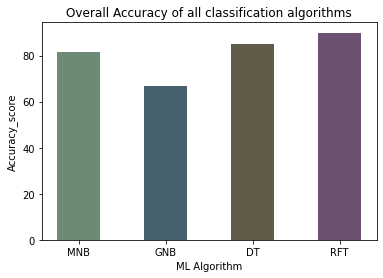

In [33]:
# display bar chart
plt.bar(['MNB'],[multi_nb_clf_acc], color="#6d8a74",width= 0.5)
plt.bar(['GNB'],[gau_nb_clf_acc], color="#47606d",width= 0.5)
plt.bar(['DT'],[dec_tree_clf_acc], color="#615b49",width= 0.5)
plt.bar(['RFT'],[rand_for_clf_acc], color="#6a5270",width= 0.5)
plt.xlabel("ML Algorithm")
plt.ylabel("Accuracy_score")
plt.title("Overall Accuracy of all classification algorithms")
plt.show()